In [4]:
from pathlib import Path

import geopandas as gpd

from GDRT.raster.register_images import align_two_rasters
from GDRT.raster.registration_algorithms import sitk_intensity_registration
from GDRT.raster.utils import update_transform
from GDRT.constants import DATA_FOLDER

In [5]:
FIXED_DTM_FILENAME = Path(DATA_FOLDER, "dtm-ptcloud_580.tif")
MOVING_DTM_FILENAME = Path(DATA_FOLDER, "dtm-ptcloud_921.tif")

ROI_FILE = Path(DATA_FOLDER, "ROI.gpkg")

SHIFTED_DTM_FILENAME = Path(DATA_FOLDER, "dtm-ptcloud_921_shifted.tif")
SHIFTED_ORTHO_FILENAME = Path(DATA_FOLDER, "ortho_921_shifted.tif")
MOVING_ORTHO_FILENAME = Path(DATA_FOLDER, "orthomosaic_921.tif")

TARGET_GSD = 0.1

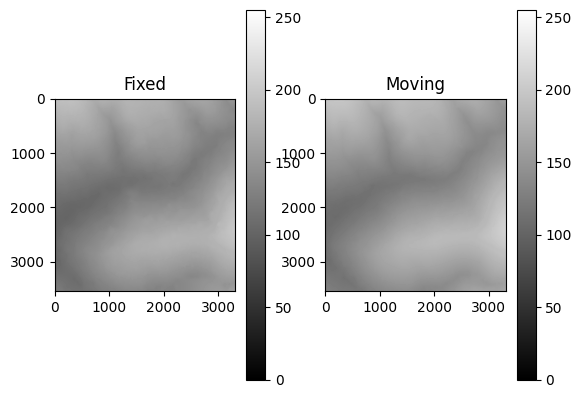

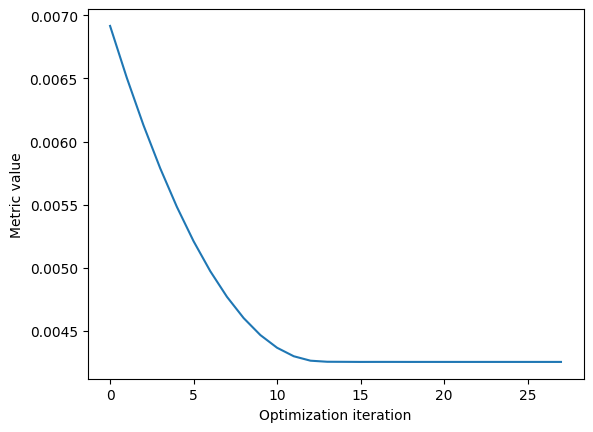

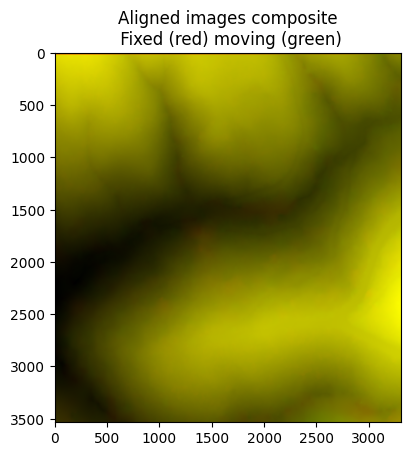

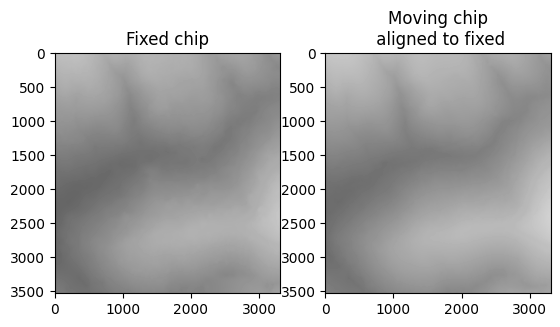

{'updated_moving_transform': array([[ 1.41660799e-01,  0.00000000e+00, -1.88108655e+05],
       [ 0.00000000e+00, -1.41666740e-01,  5.65246537e+04],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]), 'geospatial_mv2fx_transform': array([[ 1.        ,  0.        , -0.027092  ],
       [ 0.        ,  1.        , -2.51274404],
       [ 0.        ,  0.        ,  1.        ]])}


In [9]:
# TODO Convert to the appropriate CRS automatically
roi = gpd.read_file(ROI_FILE).to_crs(3310)
roi = roi.dissolve()

transforms = align_two_rasters(
    FIXED_DTM_FILENAME,
    MOVING_DTM_FILENAME,
    aligner_alg=sitk_intensity_registration,
    region_of_interest=roi,
    target_GSD=TARGET_GSD,
    vis_chips=True,
)

print(transforms)

In [7]:
update_transform(
    MOVING_DTM_FILENAME,
    SHIFTED_DTM_FILENAME,
    relative_transform=transforms["updated_moving_transform"],
    update_existing=True,
)

In [8]:
update_transform(
    MOVING_ORTHO_FILENAME,
    SHIFTED_ORTHO_FILENAME,
    relative_transform=transforms["geospatial_mv2fx_transform"],
    update_existing=True,
)